Import neccessary libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
plt.figure(figsize=(15,2))
from sklearn.metrics import classification_report

<Figure size 1500x200 with 0 Axes>

Training and Testing datasets were formed out of CIFAR-10 dataset which basically consists of images of 10 animals.

In [79]:
(x_train,y_train),(x_test, y_test)= datasets.cifar10.load_data()

Training and Testing data had 50000 and 10000 rows respectively.

In [80]:
len(x_train),len(x_test)

(50000, 10000)

In [81]:
[x_train.shape, x_test.shape]

[(50000, 32, 32, 3), (10000, 32, 32, 3)]

In [82]:
x_train[:1][:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [83]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

plot_image function was created to instantly plot an image

In [105]:
def plot_image(data,index):
    plt.figure(figsize=(15,2))
    plt.matshow(data[index])

<Figure size 1500x200 with 0 Axes>

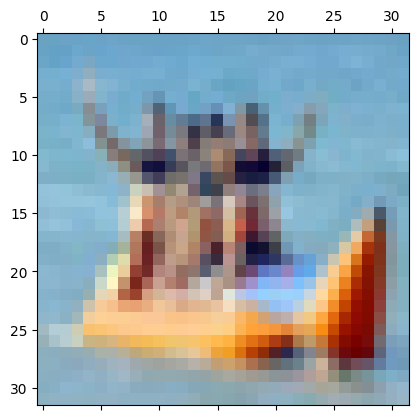

In [85]:
plot_image(x_train,92)

<Figure size 1500x200 with 0 Axes>

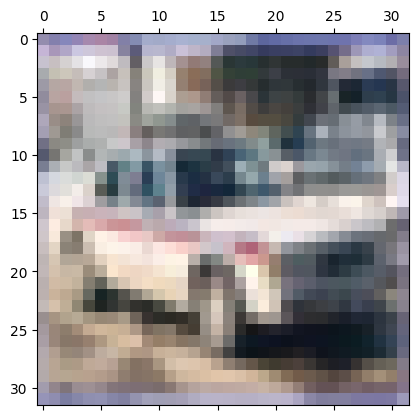

In [86]:
plot_image(x_train,65)

Normalized the data

In [88]:
x_train=x_train/255
x_test= x_test/255

Artificial Neural Network was created with relu activation function in the hidden layer and sigmoid activation function in the output layer. 5 epochs were assigned to check the accuracy of the model.

In [40]:
ann= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.8939 - accuracy: 0.3295
Epoch 2/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6878 - accuracy: 0.3988
Epoch 3/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6202 - accuracy: 0.4246
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5732 - accuracy: 0.4390
Epoch 5/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5392 - accuracy: 0.4527


In [104]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.5249 - accuracy: 0.4485


[1.5249055624008179, 0.44850000739097595]

In [41]:
y_pred= ann.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [62]:
y_pred[0]

array([0.37245715, 0.47191656, 0.36461627, 0.7944636 , 0.13873467,
       0.686107  , 0.54885876, 0.05691646, 0.6148168 , 0.158039  ],
      dtype=float32)

argmax function was used to find the maximum value in the array for every element.

In [90]:
y_pred_classes= [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 9, 8, 8, 4]

In [91]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [64]:
report= print('The classification report is \n',classification_report(y_pred_classes,y_test))

The classification report is 
               precision    recall  f1-score   support

           0       0.57      0.44      0.50      1287
           1       0.59      0.57      0.58      1039
           2       0.17      0.37      0.24       476
           3       0.36      0.31      0.33      1155
           4       0.20      0.44      0.27       449
           5       0.31      0.39      0.34       794
           6       0.66      0.40      0.49      1665
           7       0.48      0.52      0.50       920
           8       0.63      0.53      0.58      1180
           9       0.53      0.51      0.52      1035

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.43     10000
weighted avg       0.50      0.45      0.46     10000



It is evident that ANN performance is not optimal with only 45% accuracy and loe classification report scores as well.
Convolutional Neural Network is particularly used for image classification and object detection which can recognise the local patterns and spatial featues on the image. The performance of CNN is below

In [94]:
cnn= keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 53s 33ms/step - loss: 1.5000 - accuracy: 0.4585
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1774 - accuracy: 0.5849
Epoch 3/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0484 - accuracy: 0.6330
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9677 - accuracy: 0.6604
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9080 - accuracy: 0.6842


In [103]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9915 - accuracy: 0.6621


[0.9914969801902771, 0.6621000170707703]

In [97]:
y_pred= cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 17ms/step


array([[4.3377984e-01, 8.9289322e-02, 1.5205628e-01, 9.9190706e-01,
        6.1917935e-02, 9.7919321e-01, 9.2392367e-01, 6.6349328e-02,
        5.8329004e-01, 1.5854806e-01],
       [9.6663362e-01, 9.9977505e-01, 1.0877115e-02, 1.0115872e-02,
        4.3929145e-03, 1.9802314e-03, 1.0154655e-03, 2.6303536e-04,
        9.9991834e-01, 9.8724973e-01],
       [8.8279456e-01, 8.6677402e-01, 2.0332322e-01, 6.0184544e-01,
        1.5059939e-01, 1.6319598e-01, 5.8511965e-02, 5.2808348e-02,
        9.4689208e-01, 8.1453341e-01],
       [9.9386519e-01, 8.7662196e-01, 8.2116616e-01, 1.6541500e-01,
        3.4665006e-01, 1.0995199e-02, 1.0958007e-01, 5.1682703e-03,
        9.8058075e-01, 2.8205240e-02],
       [2.8952083e-02, 1.0899403e-01, 9.5907402e-01, 9.6379590e-01,
        9.8567969e-01, 8.9730167e-01, 9.9544847e-01, 2.3151342e-02,
        9.5660061e-02, 1.0160509e-02]], dtype=float32)

In [100]:
y_pred_classes= [np.argmax(element) for element in y_pred ]
y_pred_classes[:5]

[3, 8, 8, 0, 6]

In [101]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

It is evident that classification scores have improved a lot with the appliccation of CNN with improve daccuracy. This is due to the special features of CNN to recognise the local patterns and crosses with different filters.

In [102]:
print('The classification report is \n', classification_report(y_pred_classes, y_test))

The classification report is 
               precision    recall  f1-score   support

           0       0.63      0.78      0.69       809
           1       0.81      0.79      0.80      1019
           2       0.43      0.66      0.52       659
           3       0.53      0.43      0.47      1240
           4       0.51      0.70      0.59       735
           5       0.66      0.48      0.55      1389
           6       0.79      0.71      0.75      1108
           7       0.69      0.76      0.72       904
           8       0.80      0.75      0.77      1058
           9       0.78      0.72      0.75      1079

    accuracy                           0.66     10000
   macro avg       0.66      0.68      0.66     10000
weighted avg       0.67      0.66      0.66     10000

